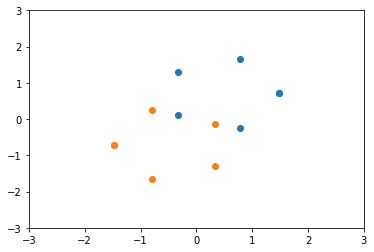

In [5]:
import numpy as np
import matplotlib.pyplot as plt


def PolynomeReg(N,R): #construit un polynôme régulier à N sommets et retourne la liste de ses N sommets concaténé au premier sommet
    Theta=2*np.pi/N*np.arange(0,N+1)
    return(np.array([[R*np.cos(theta),R*np.sin(theta)] for theta in Theta]))

def InverseSommets(polygon): #part du principe qu'on a un nombre impair de sommets donc polygon est de taille paire
    inversedpolygon=-polygon
    return inversedpolygon


def TwoPolygons(N,R,dx,dy):
    polygon1=PolynomeReg(N,R)+np.array([[1/2*dx, dy/2] for i in range(N+1)])
    polygon2=InverseSommets(PolynomeReg(N,R))-np.array([[1/2*dx, dy/2] for i in range(N+1)])
    return [polygon1,polygon2]
    polygon=PolynomeReg(5,1)

[P1,P2]=TwoPolygons(5,1,0.9635,1.4266)
plt.scatter(P1[:,0],P1[:,1])
plt.scatter(P2[:,0],P2[:,1])
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.show()

In [6]:
def PolMid(Som):  #prend en entrée la liste des sommets
    N=len(Som)-1
    PosAr=[] #milieu des arêtes
    VecAr=[] #vecteurs directeurs des arêtes
    
    for i in range(1,N+1):
        r=0.5*(Som[i]+Som[i-1])
        e=0.5*(Som[i]-Som[i-1])
        PosAr.append(r)
        VecAr.append(e)
        
    return(np.array(PosAr),np.array(VecAr))

def FormFactor(q,Som):
    N=len(Som)-1
    Pos,Vec=PolMid(Som) #on récupère les sommets, les milieux des arêtes et vecteurs directeurs
    qx,qy=q[0],q[1] #selon les directions x ou y
    c=0 #on suppose ici que c vaut 0 dans la formule de Wuttke
    s=0 #notre somme de termes pour calculer le facteur de forme d'après la formule de Wuttke.
    for i in range(N):
        ex,ey=Vec[i][0],Vec[i][1]
        rx,ry=Pos[i][0],Pos[i][1]
        
        s+=(qx*ey-qy*ex)*(np.sinc((qx*ex+qy*ey)/np.pi)*np.exp(1j*(qx*rx+qy*ry))-c)
        
    return(2*s/(1j*(qx*qx+qy*qy)))

def calcul_I_point(som1,som2,q):
    """som1 : array : tableau contenant les coordonnées des sommets du premier polygone
    som2 : array : tableau contenant les coordonnées des sommets du second polygone
    q : liste : contenant qx et qy du point
    RETOURNE : le calcul de l'intensité en q """
    A1,A2=FormFactor(q,som1),FormFactor(q,som2)
    I=(np.abs(A1+A2))**2
    return I 

def spectre_poly(Som1,Som2,dqx,dqy):
    """Som1,2 : array : tableau contenant les coordonnées des sommets des polygones
     dqx,y : integer : taille sur laquelle on calcule le spectre en x et y
     RETOURNE : le spectre de l'intensité"""
    
    Qx=np.linspace(-dqx,dqx,500)
    Qy=np.linspace(-dqy,dqy,500)

    qqx,qqy=np.meshgrid(Qx,Qy)

    plt.pcolormesh(Qx,Qy,np.log(calcul_I_point(Som1,Som2,[qqx,qqy])),shading='auto')
    plt.colorbar()
    plt.xlabel('qx')
    plt.ylabel('qy')
    plt.title("Représentation du log de l'intensité diffusée")
    plt.show()


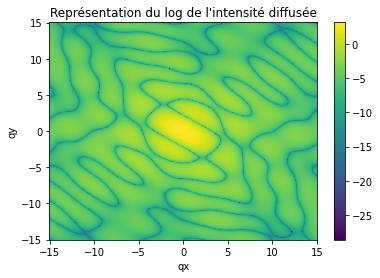

In [7]:
spectre_poly(P1,P2,15,15)